In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os import path
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split  
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pprint
pp = pprint.PrettyPrinter(indent=4)
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# downloaded = drive.CreateFile({'id':"1WutaLTOeSffgT6sH9hMk666wLFMy9Q_j"})   # replace the id with id of file you want to access
# downloaded.GetContentFile('News_Category_Dataset.json')  

In [3]:
# Import data
data = []

with open('News_Category_Dataset.json') as f:
    for line in f:
        json_dict = json.loads(line)
        current_line = [json_dict['category'], 
                        json_dict['headline'], 
                        json_dict['short_description'], 
                        json_dict['link'],
                        json_dict['date']]
        data.append(current_line)

df = pd.DataFrame(data, columns = ['category', 'headline', 'short_description', 'link', 'date']) 

In [4]:
# EDA
categories, categorical_data = df['category'].unique().tolist(), dict()

for category in categories:
    categorical_data["df_{}".format(category.lower().replace(" ", ""))] = df[(df['category'] == category)]
    
categorical_data.keys()

dict_keys(['df_crime', 'df_entertainment', 'df_worldnews', 'df_impact', 'df_politics', 'df_weirdnews', 'df_blackvoices', 'df_women', 'df_comedy', 'df_queervoices', 'df_sports', 'df_business', 'df_travel', 'df_media', 'df_tech', 'df_religion', 'df_science', 'df_latinovoices', 'df_education', 'df_college', 'df_parents', 'df_arts&culture', 'df_style', 'df_green', 'df_taste', 'df_healthyliving', 'df_theworldpost', 'df_goodnews', 'df_worldpost', 'df_fifty', 'df_arts', 'df_wellness', 'df_parenting', 'df_home&living', 'df_style&beauty', 'df_divorce', 'df_weddings', 'df_food&drink', 'df_money', 'df_environment', 'df_culture&arts'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 5 columns):
category             200853 non-null object
headline             200853 non-null object
short_description    200853 non-null object
link                 200853 non-null object
date                 200853 non-null object
dtypes: object(5)
memory usage: 7.7+ MB


In [6]:
df.describe()

,category,headline,short_description,link,date
count,200853,200853,200853,200853,200853
unique,41,199344,178353,200812,2309
top,POLITICS,Sunday Roundup,,https://www.huffingtonpost.comhttp://www.polit...,2012-08-13
freq,32739,90,19712,2,100


In [7]:
df.isnull().sum()

category             0
headline             0
short_description    0
link                 0
date                 0
dtype: int64

Text(0, 0.5, 'Number of Articles')

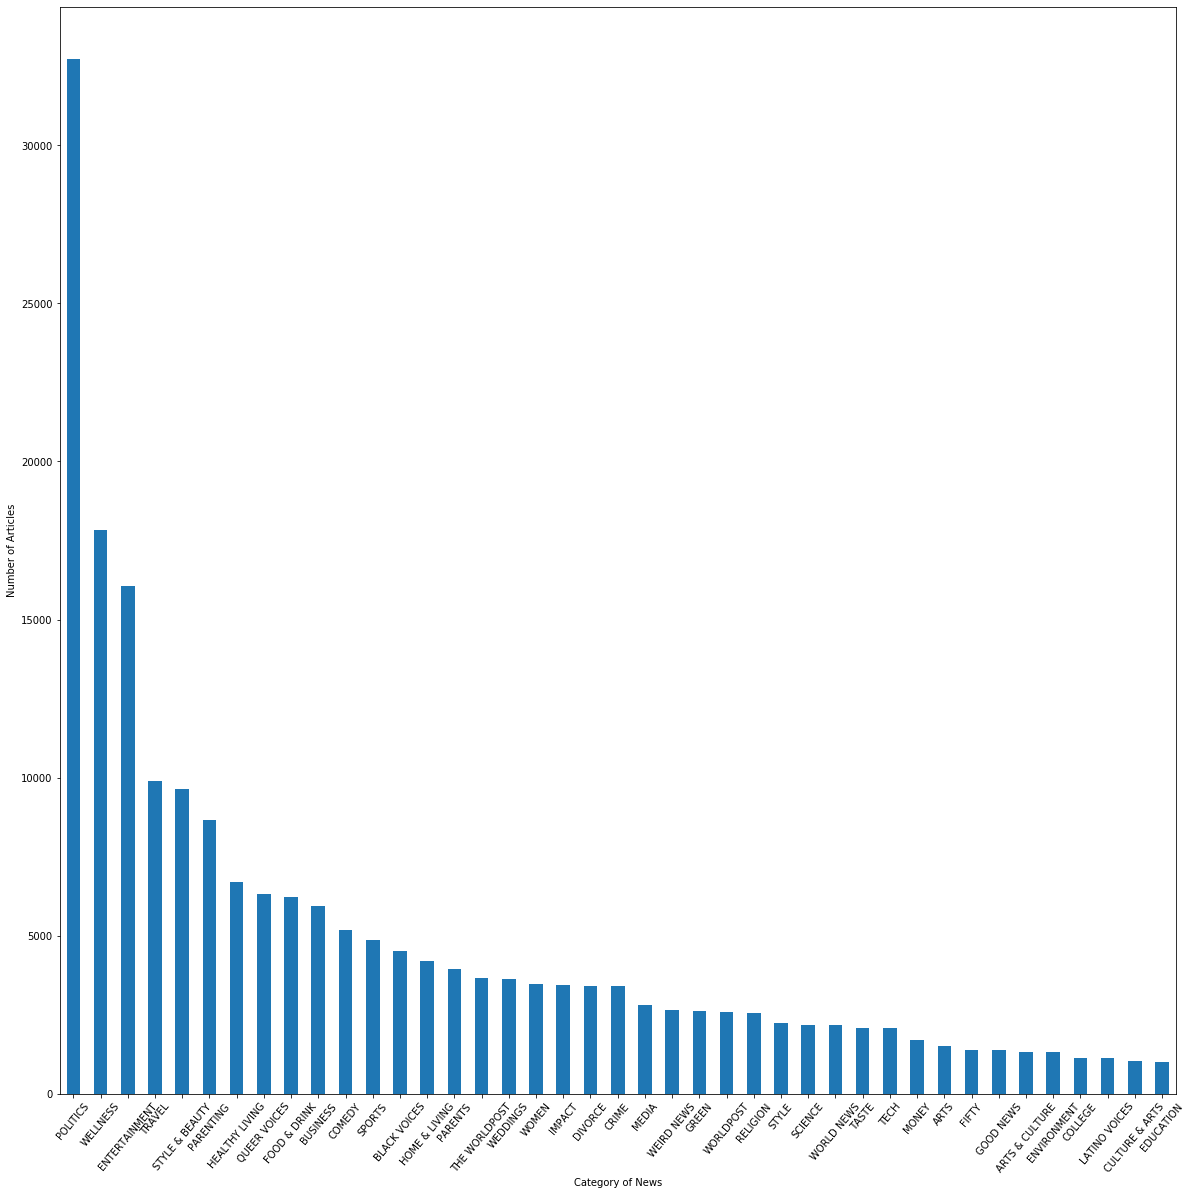

In [8]:
plt.figure(figsize=(20,20))
df['category'].value_counts().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Category of News")
plt.ylabel("Number of Articles")

In [9]:
# Create Count Vector of headlines (tokenization)
nltk.download('stopwords')
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2), stop_words = stopwords.words('english'))
cvector.fit(df['headline'])                                                                           

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debanikpurkayastha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [10]:
# Functions to visualize headlines and descriptions for different categories
def create_wordcloud(category):
    text = " ".join(desc for desc in categorical_data[category]['short_description'])
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'white', stopwords = stopwords.words('english')).generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def createTFMatrix(category):
    return cvector.transform(df[df.category == category].headline)

def generateTF_dataframe(matrix):
    category_words = matrix.sum(axis=0)
    category_words_freq = [(word, category_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
    return pd.DataFrame(list(sorted(category_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms', 'Frequency'])

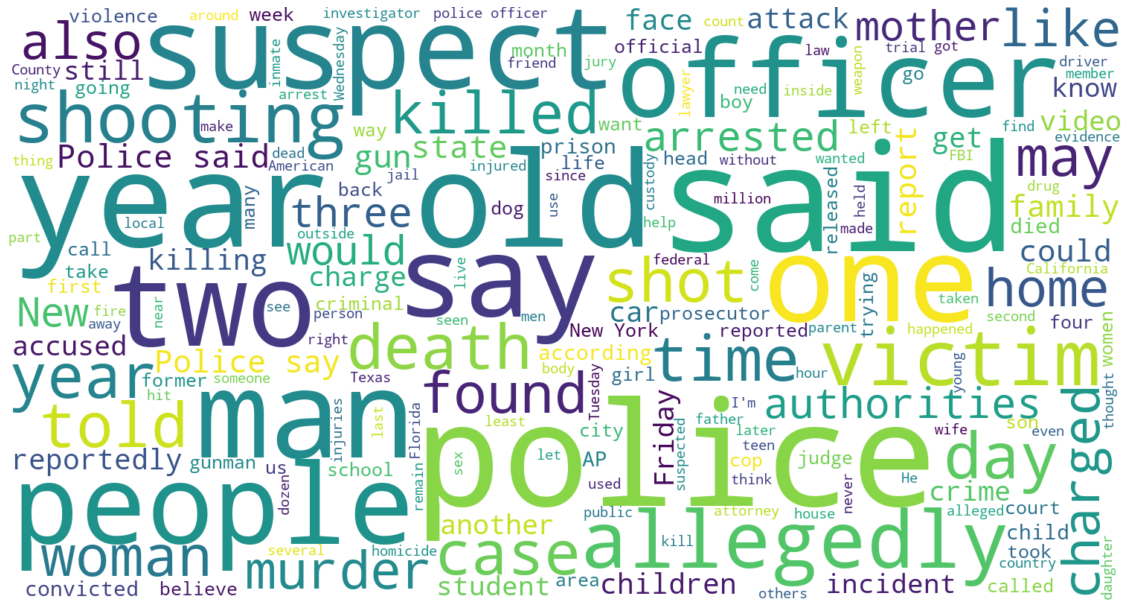

(      Terms  Frequency
 0    police        456
 1       man        421
 2  shooting        260
 3      cops        186
 4      year        178
 5    killed        173
 6   suspect        168
 7     woman        164
 8      dead        160
 9       old        159, None)

In [12]:
# Most relevant words in 'CRIME'
crime_matrix = createTFMatrix('CRIME')
generateTF_dataframe(crime_matrix).head(10),create_wordcloud('df_crime')

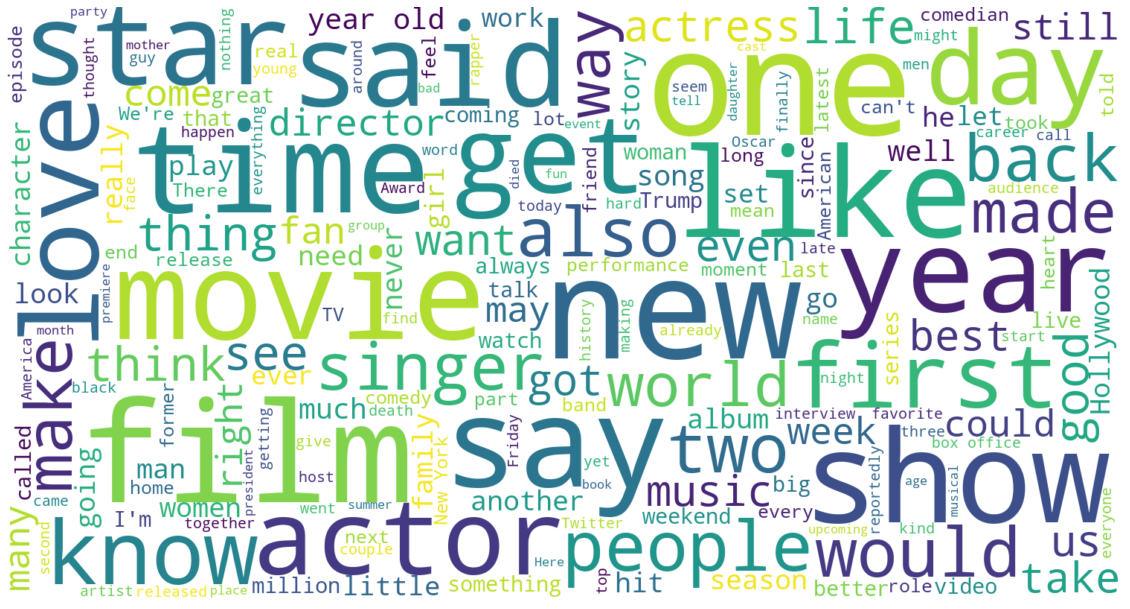

(     Terms  Frequency
 0      new       1092
 1    trump        716
 2     star        559
 3     says        502
 4    first        475
 5    movie        424
 6     show        403
 7  trailer        388
 8   donald        371
 9    video        371, None)

In [13]:
# Most relevant words in 'ENTERTAINMENT'
entertainment_matrix = createTFMatrix('ENTERTAINMENT')
generateTF_dataframe(entertainment_matrix).head(10), create_wordcloud('df_entertainment')

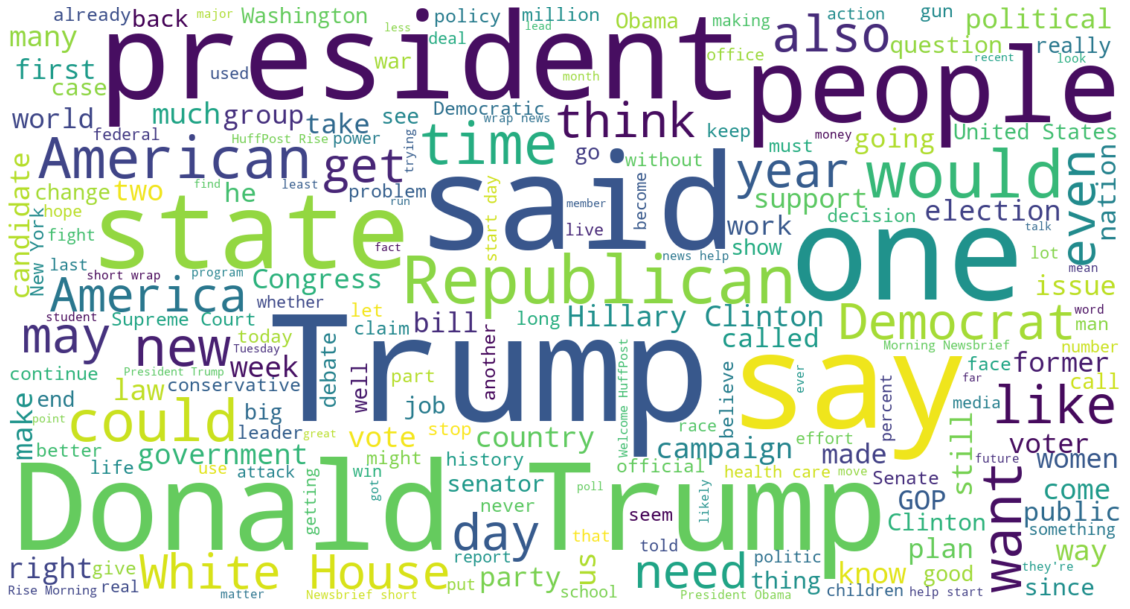

(          Terms  Frequency
 0         trump       9016
 1        donald       2986
 2  donald trump       2946
 3       clinton       1750
 4           gop       1727
 5         obama       1641
 6       hillary       1292
 7          says       1267
 8           new       1252
 9         house       1172, None)

In [14]:
# Most relevant words in 'POLITICS'
politics_matrix = createTFMatrix('POLITICS')
generateTF_dataframe(politics_matrix).head(10), create_wordcloud('df_politics')

In [14]:
# Setting up train/test data
features_train, features_test, labels_train, labels_test = train_test_split(df['headline'], df['category'], test_size=0.2, random_state=10)
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
features_train = vectorizer.fit_transform(features_train)
features_test = vectorizer.transform(features_test)
# from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import classification_report, confusion_matrix
# selector = SelectPercentile(f_classif, percentile=10)
# selector.fit(features_train, labels_train)
# features_train = selector.transform(features_train).toarray()
# features_test = selector.transform(features_test).toarray()

In [15]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(features_train, labels_train)
preds = model.predict(features_test)
true = labels_test

# Display results
print(classification_report(true, preds))
print(confusion_matrix(true, preds))

/Users/debanikpurkayastha/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00       286
ARTS & CULTURE       0.00      0.00      0.00       272
  BLACK VOICES       0.75      0.01      0.03       890
      BUSINESS       0.71      0.07      0.13      1154
       COLLEGE       0.00      0.00      0.00       220
        COMEDY       0.82      0.05      0.10      1032
         CRIME       0.76      0.07      0.13       697
CULTURE & ARTS       1.00      0.01      0.02       212
       DIVORCE       0.91      0.15      0.26       669
     EDUCATION       0.00      0.00      0.00       180
 ENTERTAINMENT       0.43      0.77      0.55      3253
   ENVIRONMENT       1.00      0.02      0.03       250
         FIFTY       0.00      0.00      0.00       284
  FOOD & DRINK       0.69      0.52      0.59      1254
     GOOD NEWS       0.00      0.00      0.00       283
         GREEN       1.00      0.00      0.00       543
HEALTHY LIVING       0.80      0.01      0.01  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomForstModel = RandomForestClassifier()

RandomForstModel.fit(features_train, labels_train)
preds = RandomForstModel.predict(features_test)
true = labels_test

print(classification_report(true, preds))
# print(confusion_matrix(true, preds))